In [17]:
from salishsea_tools import evaltools as et
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import pickle

%matplotlib inline

In [18]:
# df=et.loadDFOCTD(datelims=(dt.datetime(2013,1,1),dt.datetime(2017,1,1)))
# print(len(df))
# df.dropna(subset=['Fluor'],inplace=True)
# print(len(df))
# plt.hist(df['Fluor'],100);

# # path to model files:
# PATH= '/results2/SalishSea/nowcast-green.201905/'

# # start and end dates for analysis:
# start_date = dt.datetime(2013,1,1)
# end_date = dt.datetime(2017,1,1)

# # number of days per model file:
# flen=1

# # dictionary mapping desired model variables to the file types where they are found
# #filemap={'vosaline':'grid_T','votemper':'grid_T'}
# filemap={'diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T'}

# # dictionary mapping model file types to their time resolution in hours (1 is hourly files, 24 is daily)
# fdict={'ptrc_T':1,'grid_T':1}

# # results format
# # -- nowcast: files like 01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc
# # -- long: files like SalishSea_1h_20150206_20150804_ptrc_T_20150427-20150506.nc, all in one directory
# namfmt='nowcast'

# data=et.matchData(df,filemap,fdict,start_date,end_date,namfmt,PATH)

# pickle.dump(data, open("./pkls/FLUOR_data.pkl", 'wb'))
# data.to_csv('./pkls/FLUOR_data.csv',index=False)

In [19]:
data = pickle.load(open('./pkls/FLUOR_data.pkl', 'rb'))  

In [20]:
display(list(data.columns.values))

monthar = np.array(data['Month'])
season = np.zeros_like(monthar)

season[(monthar==12) | (monthar<3)] =1
season[(monthar>=3) & (monthar<6)] =2
season[(monthar>=6) & (monthar<9)] =3
season[(monthar>=9) & (monthar<12)] =4

### winter is 1 

['Year',
 'Month',
 'Day',
 'Hour',
 'Lat',
 'Lon',
 'Z',
 'SA',
 'CT',
 'Fluor',
 'dtUTC',
 'j',
 'i',
 'mod_diatoms',
 'mod_ciliates',
 'mod_flagellates',
 'k']

In [21]:
# mod_chl_N=1.6
# #mod_chl_N=2.0
# data['l10_obsChl']=np.log10(data['Fluor']+0.01)
# data['l10_modChl']=np.log10(mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.01)
# data['mod_Chl']=mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])
# data['season'] = season

In [22]:
# cver = "BIO"
# clusterD='/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/'
# cfile = {2013:"BIO_clno_5_2013_reass.pkl",2014:"BIO_clno_5_2014_reass.pkl", 
#          2015: "BIO_clno_5_2015_reass.pkl", 2016: "BIO_clno_5_2016_reass.pkl"}
# cxf='Xcoords_for571_stations.pkl'
# cyf='Ycoords_for571_stations.pkl'
# print('Cluster version is:', cver)
# # papermill reads dictionary keys as strings, so add code to correct this
# cfile2=dict()
# for key,val in cfile.items():
#     cfile2[int(key)]=val
# cfile=cfile2
# cx=pickle.load(open(clusterD+cxf, 'rb'))
# cy=pickle.load(open(clusterD+cyf, 'rb'))
# cf=dict()
# for iyear in cfile.keys():
#     cf[iyear]=pickle.load(open(clusterD+cfile[iyear],'rb'))

# def round2(num):
#     return int(np.trunc((num+2)/10)*10+2)

# data['Cluster']=np.zeros(len(data))
# print(len(data))
# for ir, row in data.iterrows():
#     ii=(cx==round2(row['i']))&(cy==round2(row['j']))
#     if ir%100 == 0:
#         print(ir)
#     if sum(ii)==1:
#         cluster=cf[row['Year']][ii]
#         data.at[ir,'Cluster']=int(cluster)

In [23]:
# pickle.dump(data, open("./pkls/FLUOR_data_augmented.pkl", 'wb'))

In [24]:


data = pickle.load(open('./pkls/FLUOR_data_augmented.pkl', 'rb'))  
display(list(data.columns.values))

['Year',
 'Month',
 'Day',
 'Hour',
 'Lat',
 'Lon',
 'Z',
 'SA',
 'CT',
 'Fluor',
 'dtUTC',
 'j',
 'i',
 'mod_diatoms',
 'mod_ciliates',
 'mod_flagellates',
 'k',
 'l10_obsChl',
 'l10_modChl',
 'mod_Chl',
 'season',
 'Cluster']

<function matplotlib.pyplot.suptitle(t, **kwargs)>

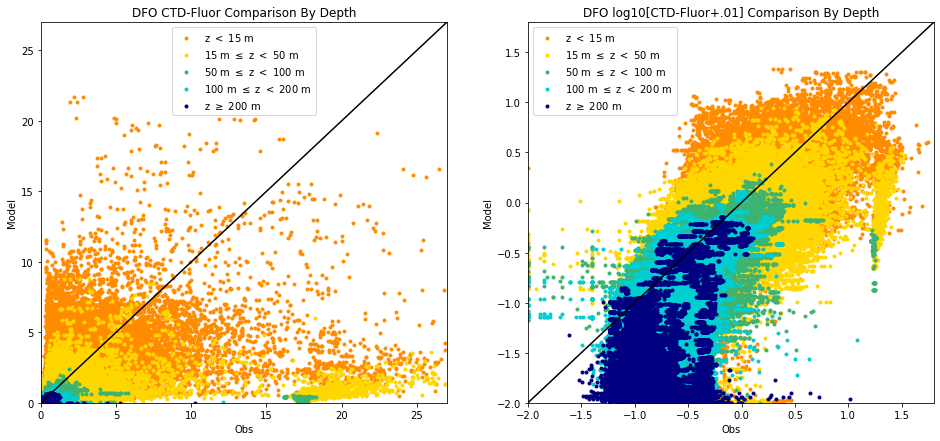

In [25]:
fig, ax = plt.subplots(1,2,figsize = (16,7))
ps=et.varvarPlot(ax[0],data,'Fluor','mod_Chl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
ax[0].legend(handles=ps)
ax[0].set_xlabel('Obs')
ax[0].set_ylabel('Model')
ax[0].set_title('DFO CTD-Fluor Comparison By Depth')
ps=et.varvarPlot(ax[1],data,'l10_obsChl','l10_modChl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
ax[1].legend(handles=ps)
ax[1].set_xlabel('Obs')
ax[1].set_ylabel('Model')
ax[1].set_title('DFO log10[CTD-Fluor+.01] Comparison By Depth')
ax[0].set_xlim(0,27)
ax[0].set_ylim(0,27)
ax[0].plot((0,27),(0,27),'k-')
ax[1].set_xlim(-2,1.8)
ax[1].set_ylim(-2,1.8)
ax[1].plot((-2,1.8),(-2,1.8),'k-')

plt.suptitle

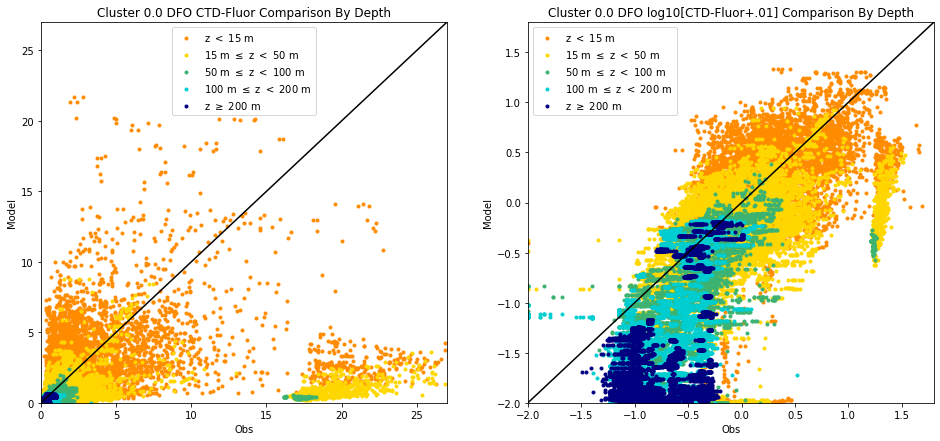

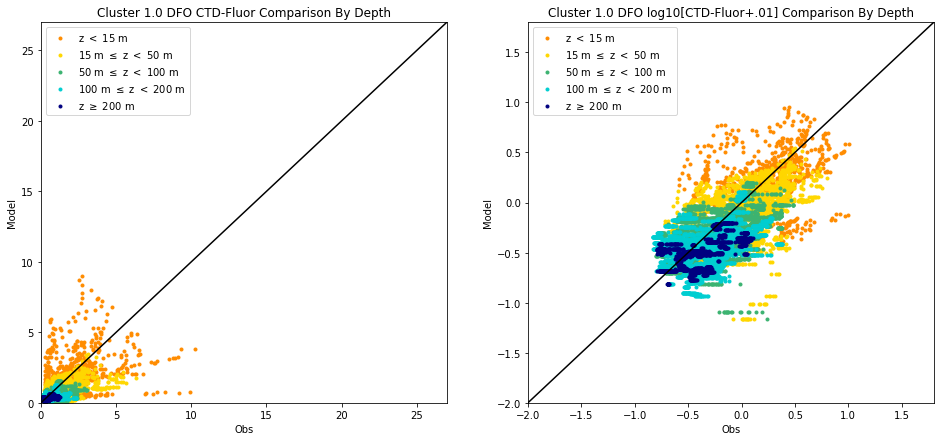

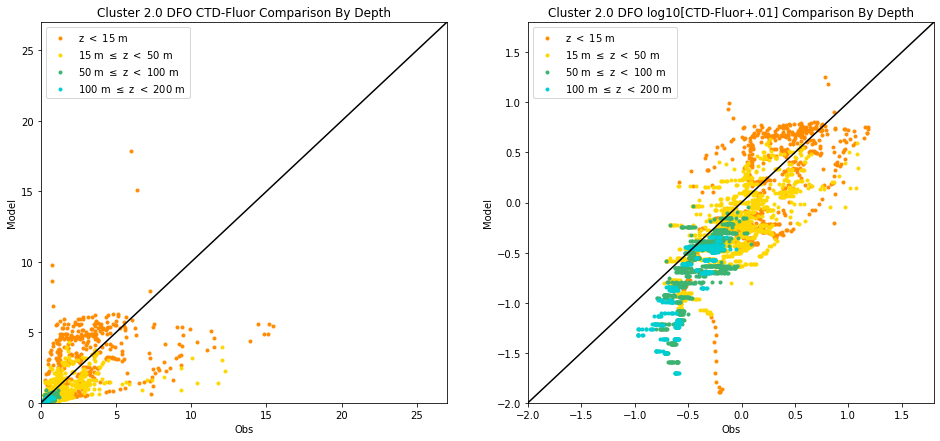

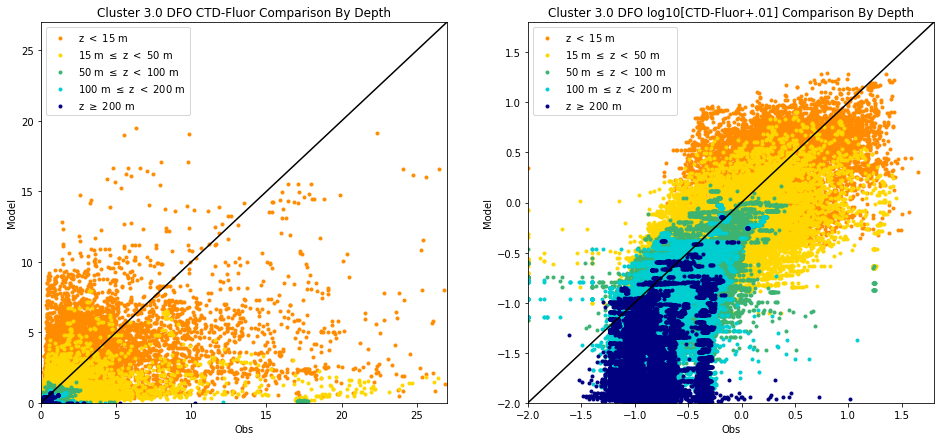

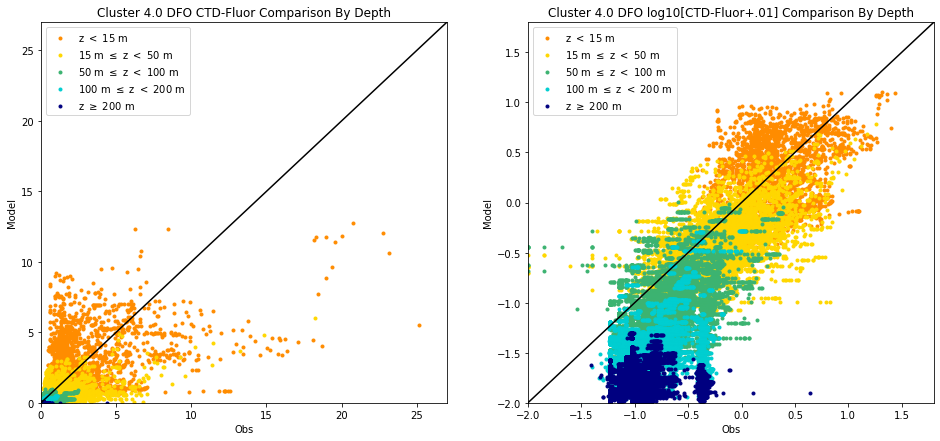

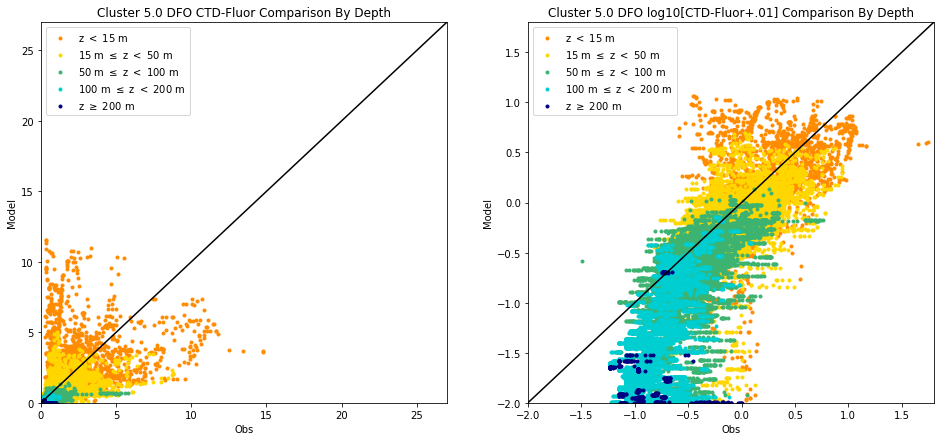

In [26]:
for ic in np.unique(data['Cluster']):
    idata=data.loc[data.Cluster==ic]
    fig, ax = plt.subplots(1,2,figsize = (16,7))
    ps=et.varvarPlot(ax[0],idata,'Fluor','mod_Chl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
    ax[0].legend(handles=ps)
    ax[0].set_xlabel('Obs')
    ax[0].set_ylabel('Model')
    ax[0].set_title(f'Cluster {ic} DFO CTD-Fluor Comparison By Depth')
    ps=et.varvarPlot(ax[1],idata,'l10_obsChl','l10_modChl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
    ax[1].legend(handles=ps)
    ax[1].set_xlabel('Obs')
    ax[1].set_ylabel('Model')
    ax[1].set_title(f'Cluster {ic} DFO log10[CTD-Fluor+.01] Comparison By Depth')
    ax[0].set_xlim(0,27)
    ax[0].set_ylim(0,27)
    ax[0].plot((0,27),(0,27),'k-')
    ax[1].set_xlim(-2,1.8)
    ax[1].set_ylim(-2,1.8)
    ax[1].plot((-2,1.8),(-2,1.8),'k-')

    

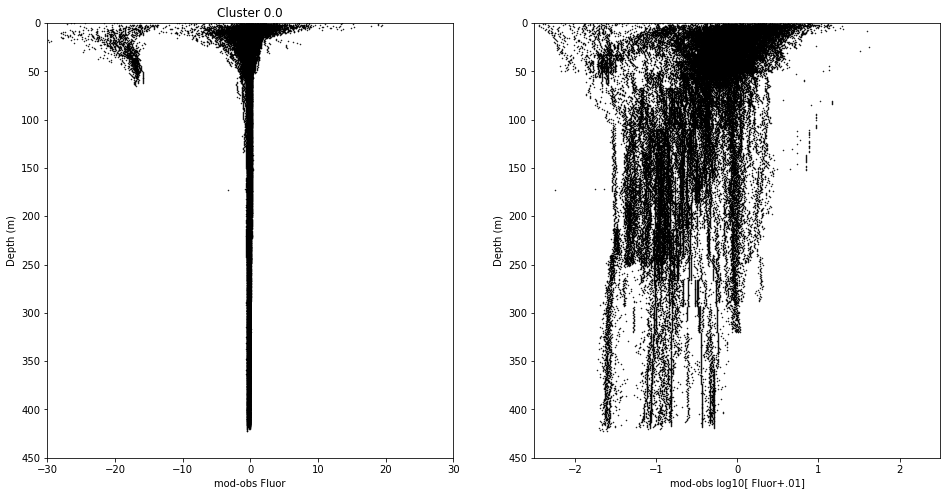

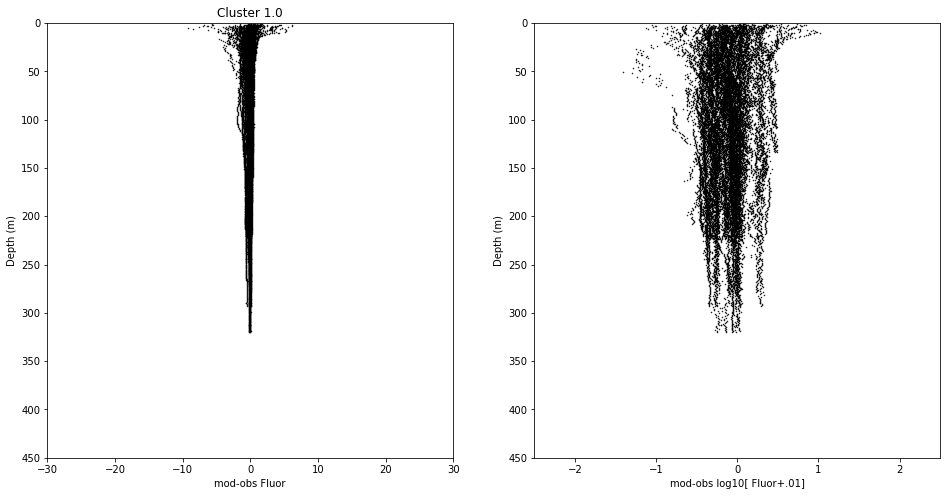

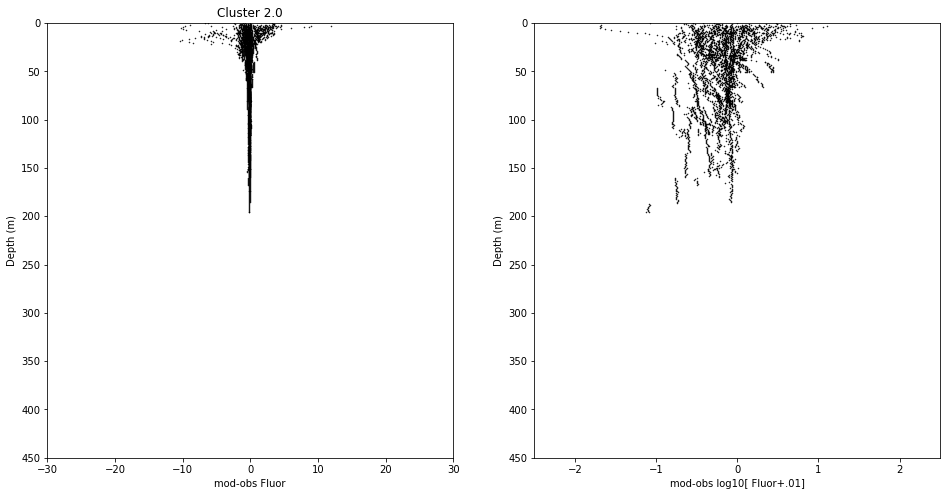

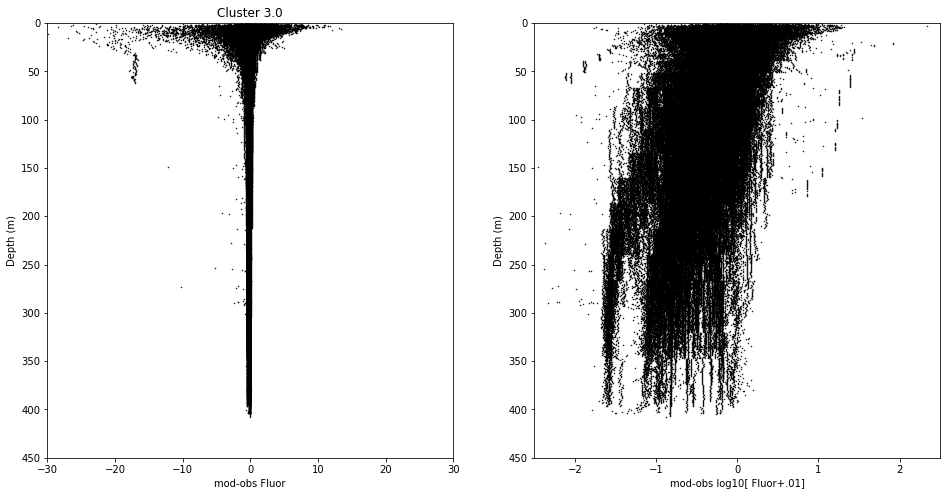

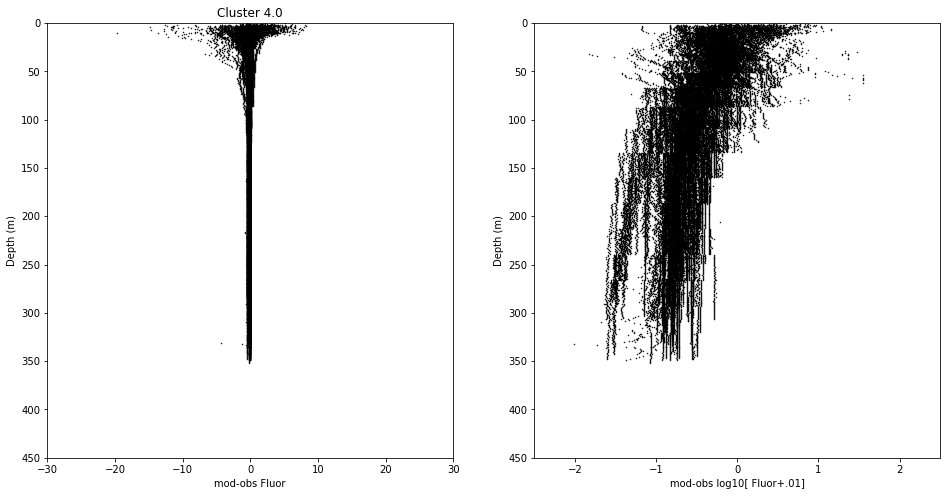

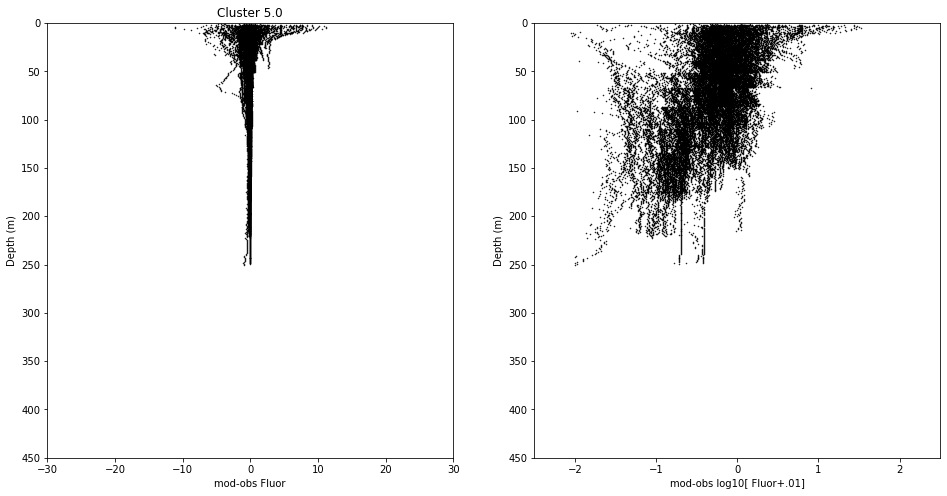

In [27]:
for ic in np.unique(data['Cluster']):
    idata=data.loc[data.Cluster==ic]
    fig, ax = plt.subplots(1,2,figsize = (16,8))
    ax[0].plot(idata['mod_Chl']-idata['Fluor'],idata['Z'],'k.',ms=1)
    ax[1].plot(idata['l10_modChl']-idata['l10_obsChl'],idata['Z'],'k.',ms=1)
    ax[0].set_ylim(450,0)
    ax[1].set_ylim(450,0)
    ax[0].set_xlim(-30,30)
    ax[1].set_xlim(-2.5,2.5)
    ax[0].set_title('Cluster '+str(ic))
    ax[0].set_xlabel('mod-obs Fluor')
    ax[1].set_xlabel('mod-obs log10[ Fluor+.01]')
    ax[0].set_ylabel('Depth (m)')
    ax[1].set_ylabel('Depth (m)')

In [28]:
np.unique(data['Cluster'])

array([0., 1., 2., 3., 4., 5.])

Text(0, 0.5, 'Depth (m)')

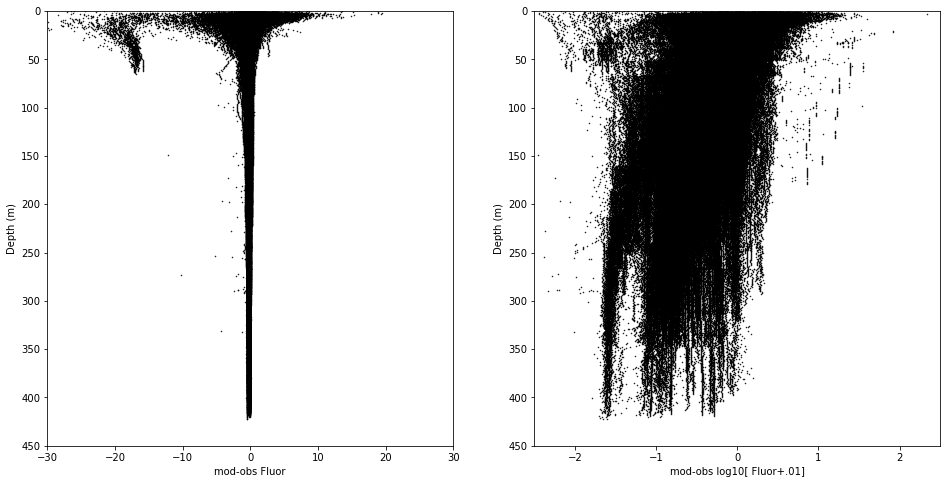

In [29]:
    fig, ax = plt.subplots(1,2,figsize = (16,8))
    ax[0].plot(data['mod_Chl']-data['Fluor'],data['Z'],'k.',ms=1)
    ax[1].plot(data['l10_modChl']-data['l10_obsChl'],data['Z'],'k.',ms=1)
    ax[0].set_ylim(450,0)
    ax[1].set_ylim(450,0)
    ax[0].set_xlim(-30,30)
    ax[1].set_xlim(-2.5,2.5)
    ax[0].set_xlabel('mod-obs Fluor')
    ax[1].set_xlabel('mod-obs log10[ Fluor+.01]')
    ax[0].set_ylabel('Depth (m)')
    ax[1].set_ylabel('Depth (m)')

In [30]:
print('Surface Chl:')
print('all:')
et.printstats(data.loc[data.Z<10,:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z<10),:],'Fluor','mod_Chl')

Surface Chl:
all:
  N: 16390
  bias: -0.33052002919952406
  RMSE: 4.076911841259702
  WSS: 0.5236510420493814
cluster 0
  N: 4629
  bias: -0.6771442519577837
  RMSE: 5.227049139447129
  WSS: 0.4702350962766798
cluster 1
  N: 703
  bias: -0.11604933610385793
  RMSE: 1.7780662441788255
  WSS: 0.6251896257787184
cluster 2
  N: 400
  bias: 0.1270736738650875
  RMSE: 2.415895655387155
  WSS: 0.679146818945814
cluster 3
  N: 7135
  bias: -0.328926365799854
  RMSE: 3.8908003289797644
  WSS: 0.5502184604671982
cluster 4
  N: 1799
  bias: -0.1042690604568195
  RMSE: 2.820975016745078
  WSS: 0.6105631738411817
cluster 5
  N: 1724
  bias: 0.16386330464683185
  RMSE: 3.3252272676282373
  WSS: 0.48353921556555113


In [31]:
for icl in range(0,6):
    print('cluster',icl)
    print(np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<10),['Fluor']].values),np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<10),['mod_Chl']].values))

cluster 0
3.6122390412437917 2.9336647780703
cluster 1
1.9285661450924612 1.8125168089886032
cluster 2
2.5132175 2.6402911738650876
cluster 3
3.5106100911002103 3.1816837253003563
cluster 4
2.7854930516953855 2.681223991238566
cluster 5
2.2342244779582368 2.3980877826050686


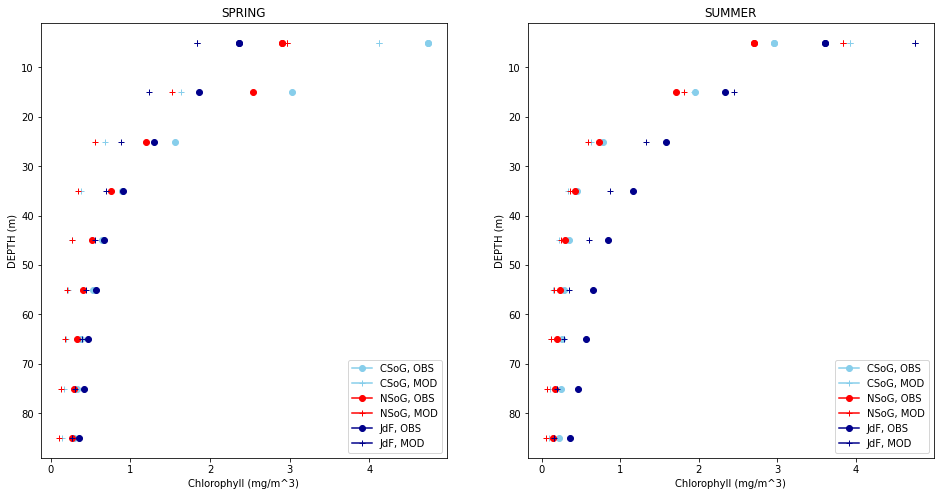

In [56]:
fig, ax = plt.subplots(1,2,figsize = (16,8))

icl = 3

for i in range(1,10):
    d0 = 10*i-10; d1 = 10*i
    obsdat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==2),['Fluor']].values)
    if i == 1:
        ax[0].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'skyblue', label = 'CSoG, OBS')
    ax[0].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'skyblue')#, label = 'CSoG, OBS')

    moddat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==2),['mod_Chl']].values)
    if i == 1:
        ax[0].plot(moddat,(d1+d0)/2, marker = '+', color = 'skyblue', label = 'CSoG, MOD')  
    ax[0].plot(moddat,(d1+d0)/2, marker = '+', color = 'skyblue') 

icl = 4
for i in range(1,10):
    d0 = 10*i-10; d1 = 10*i
    obsdat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==2),['Fluor']].values)
    if i == 1:
        ax[0].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'red', label = 'NSoG, OBS')
    ax[0].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'red')#, label = 'NSoG, OBS')

    moddat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==2),['mod_Chl']].values)
    if i == 1:
        ax[0].plot(moddat,(d1+d0)/2, marker = '+', color = 'red', label = 'NSoG, MOD')  
    ax[0].plot(moddat,(d1+d0)/2, marker = '+', color = 'red')     
    
icl = 5
for i in range(1,10):
    d0 = 10*i-10; d1 = 10*i
    obsdat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==2),['Fluor']].values)
    if i == 1:
        ax[0].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'darkblue', label = 'JdF, OBS')
    ax[0].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'darkblue')#, label = 'JdF, OBS')

    moddat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==2),['mod_Chl']].values)
    if i == 1:
        ax[0].plot(moddat,(d1+d0)/2, marker = '+', color = 'darkblue', label = 'JdF, MOD')  
    ax[0].plot(moddat,(d1+d0)/2, marker = '+', color = 'darkblue')     
    
ax[0].legend(loc = 4)
ax[0].invert_yaxis()
ax[0].set_title('SPRING')

#### summer
icl = 3

for i in range(1,10):
    d0 = 10*i-10; d1 = 10*i
    obsdat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==3),['Fluor']].values)
    if i == 1:
        ax[1].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'skyblue', label = 'CSoG, OBS')
    ax[1].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'skyblue')#, label = 'CSoG, OBS')

    moddat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==3),['mod_Chl']].values)
    if i == 1:
        ax[1].plot(moddat,(d1+d0)/2, marker = '+', color = 'skyblue', label = 'CSoG, MOD')  
    ax[1].plot(moddat,(d1+d0)/2, marker = '+', color = 'skyblue') 

icl = 4
for i in range(1,10):
    d0 = 10*i-10; d1 = 10*i
    obsdat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==3),['Fluor']].values)
    if i == 1:
        ax[1].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'red', label = 'NSoG, OBS')
    ax[1].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'red')#, label = 'NSoG, OBS')

    moddat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==3),['mod_Chl']].values)
    if i == 1:
        ax[1].plot(moddat,(d1+d0)/2, marker = '+', color = 'red', label = 'NSoG, MOD')  
    ax[1].plot(moddat,(d1+d0)/2, marker = '+', color = 'red')     
    
icl = 5
for i in range(1,10):
    d0 = 10*i-10; d1 = 10*i
    obsdat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==3),['Fluor']].values)
    if i == 1:
        ax[1].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'darkblue', label = 'JdF, OBS')
    ax[1].plot(obsdat,(d1+d0)/2, marker = 'o', color = 'darkblue')#, label = 'JdF, OBS')

    moddat = np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<d1)&(data.Z>d0)&(data.season==3),['mod_Chl']].values)
    if i == 1:
        ax[1].plot(moddat,(d1+d0)/2, marker = '+', color = 'darkblue', label = 'JdF, MOD')  
    ax[1].plot(moddat,(d1+d0)/2, marker = '+', color = 'darkblue')     
    
ax[1].legend(loc = 4)
ax[1].invert_yaxis()
ax[1].set_title('SUMMER')

for i in range(0,2):
    ax[i].set_ylabel('DEPTH (m)')
    ax[i].set_xlabel('Chlorophyll (mg/m^3)')

In [32]:
print('10-20m Chl:')
print('all:')
et.printstats(data.loc[(data.Z>=10)&(data.Z<20),:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z>=10)&(data.Z<20),:],'Fluor','mod_Chl')

10-20m Chl:
all:
  N: 18924
  bias: -0.8301348019046282
  RMSE: 3.2263387376373323
  WSS: 0.40716128169243737
cluster 0
  N: 5098
  bias: -1.394528782539166
  RMSE: 4.822325107753966
  WSS: 0.3259655309854478
cluster 1
  N: 813
  bias: -0.36447475161394216
  RMSE: 1.0622954465133838
  WSS: 0.694772226800964
cluster 2
  N: 442
  bias: -0.5640315906780335
  RMSE: 2.0843308710933934
  WSS: 0.6253201552030744
cluster 3
  N: 8348
  bias: -0.739774767543661
  RMSE: 2.7710339601230727
  WSS: 0.4749506211817306
cluster 4
  N: 2172
  bias: -0.6006902093252451
  RMSE: 1.7862551642908857
  WSS: 0.6732390364382219
cluster 5
  N: 2051
  bias: -0.2799631533923801
  RMSE: 1.4915162026724598
  WSS: 0.5974344765969719


In [33]:
print('20-30m Chl:')
print('all:')
et.printstats(data.loc[(data.Z>=20)&(data.Z<30),:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z>=20)&(data.Z<30),:],'Fluor','mod_Chl')

20-30m Chl:
all:
  N: 18383
  bias: -0.6329817237197815
  RMSE: 2.496083224294225
  WSS: 0.2651089813984451
cluster 0
  N: 4756
  bias: -1.2504607125637532
  RMSE: 4.2786612019357575
  WSS: 0.2418007825756937
cluster 1
  N: 805
  bias: -0.35650352413339637
  RMSE: 0.8617768621204027
  WSS: 0.6104780986326084
cluster 2
  N: 380
  bias: -0.46467796515665527
  RMSE: 0.9547554689885368
  WSS: 0.5985261813881974
cluster 3
  N: 8226
  bias: -0.44752881016434587
  RMSE: 1.6734647042871353
  WSS: 0.3747765853872096
cluster 4
  N: 2166
  bias: -0.4238069328727787
  RMSE: 0.9092295875631933
  WSS: 0.4677430311749712
cluster 5
  N: 2050
  bias: -0.30537127096891226
  RMSE: 0.9091842888774058
  WSS: 0.5935763108839777


In [34]:
print('30-40m Chl:')
print('all:')
et.printstats(data.loc[(data.Z>=30)&(data.Z<40),:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z>=30)&(data.Z<40),:],'Fluor','mod_Chl')

30-40m Chl:
all:
  N: 17988
  bias: -0.4662766350650288
  RMSE: 2.0739629424130444
  WSS: 0.18922968273557128
cluster 0
  N: 4481
  bias: -1.0636492823678938
  RMSE: 3.8404586302994623
  WSS: 0.2049713615729889
cluster 1
  N: 814
  bias: -0.29291958422880127
  RMSE: 0.6832359847363637
  WSS: 0.5977328823030853
cluster 2
  N: 344
  bias: -0.27011790860383655
  RMSE: 0.5237538011510302
  WSS: 0.6944839249930506
cluster 3
  N: 8148
  bias: -0.2708290169477505
  RMSE: 1.0498489732772178
  WSS: 0.3015778365492491
cluster 4
  N: 2152
  bias: -0.26158913734393563
  RMSE: 0.6495958313148046
  WSS: 0.38995422550565206
cluster 5
  N: 2049
  bias: -0.2538603813971796
  RMSE: 0.6694701417289198
  WSS: 0.5909144837306618


In [35]:
print('50-70m')
for icl in range(0,6):
    print('cluster',icl)
    print(np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<70)&(data.Z>50),['Fluor']].values),np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<70)&(data.Z>50),['mod_Chl']].values))

50-70m
cluster 0
1.034465687454852 0.25334127763485004
cluster 1
0.7702530864197531 0.5300598948149954
cluster 2
0.48512 0.30907628327651937
cluster 3
0.32461625414149287 0.1529535150707533
cluster 4
0.3041421859545005 0.14450812701739946
cluster 5
0.5035501234567902 0.3022905828195779


In [36]:
test=et.loadDFOCTD()

In [37]:
np.min(test['dtUTC'])

Timestamp('2014-01-15 17:27:56')

In [38]:
np.max(test['dtUTC'])

Timestamp('2020-03-20 14:51:36')